In [ ]:
# reference  https://mathlab.github.io/PyDMD/tutorial6hodmd.html


In [2]:
pip install pydmd

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import time

from pydmd import HODMD

In [13]:
def myfunc(x):
    return np.cos(x)*np.sin(np.cos(x)) + np.cos(x*.2)

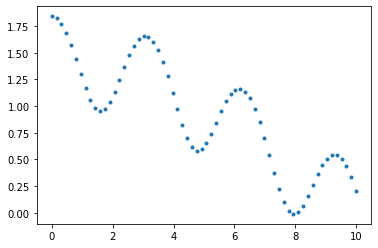

In [14]:
x = np.linspace(0, 10, 64)
y = myfunc(x)
snapshots = y
plt.plot(x, snapshots, '.')
plt.show()

In [15]:
hodmd = HODMD(svd_rank=0, exact=True, opt=True, d=30).fit(snapshots)

In [16]:
hodmd.reconstructed_data.shape

(1, 64)

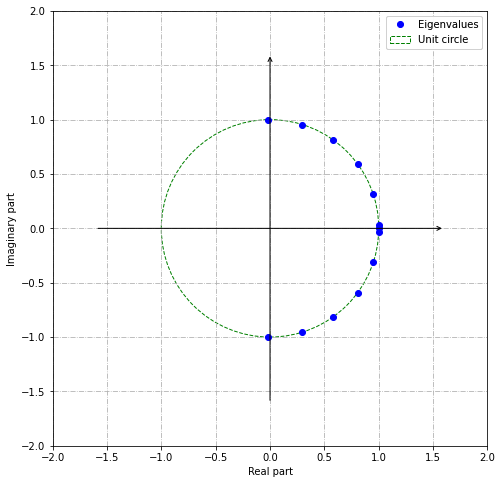

In [17]:
hodmd.plot_eigs()

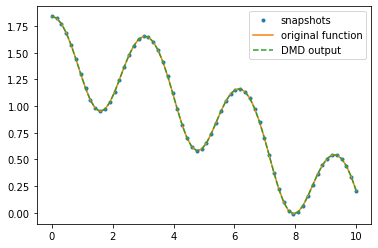

In [18]:
hodmd.original_time['dt'] = hodmd.dmd_time['dt'] = x[1] - x[0]
hodmd.original_time['t0'] = hodmd.dmd_time['t0'] = x[0]
hodmd.original_time['tend'] = hodmd.dmd_time['tend'] = x[-1]

plt.plot(hodmd.original_timesteps, snapshots, '.', label='snapshots')
plt.plot(hodmd.original_timesteps, y, '-', label='original function')
plt.plot(hodmd.dmd_timesteps, hodmd.reconstructed_data[0].real, '--', label='DMD output')
plt.legend()
plt.show()

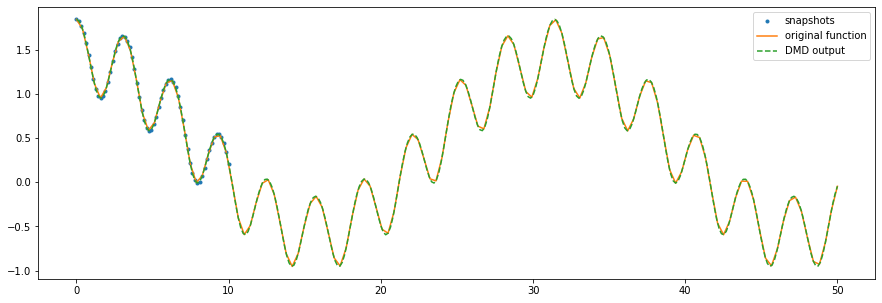

In [19]:
hodmd.dmd_time['tend'] = 50

fig = plt.figure(figsize=(15, 5))
plt.plot(hodmd.original_timesteps, snapshots, '.', label='snapshots')
plt.plot(np.linspace(0, 50, 128), myfunc(np.linspace(0, 50, 128)), '-', label='original function')
plt.plot(hodmd.dmd_timesteps, hodmd.reconstructed_data[0].real, '--', label='DMD output')
plt.legend()
plt.show()

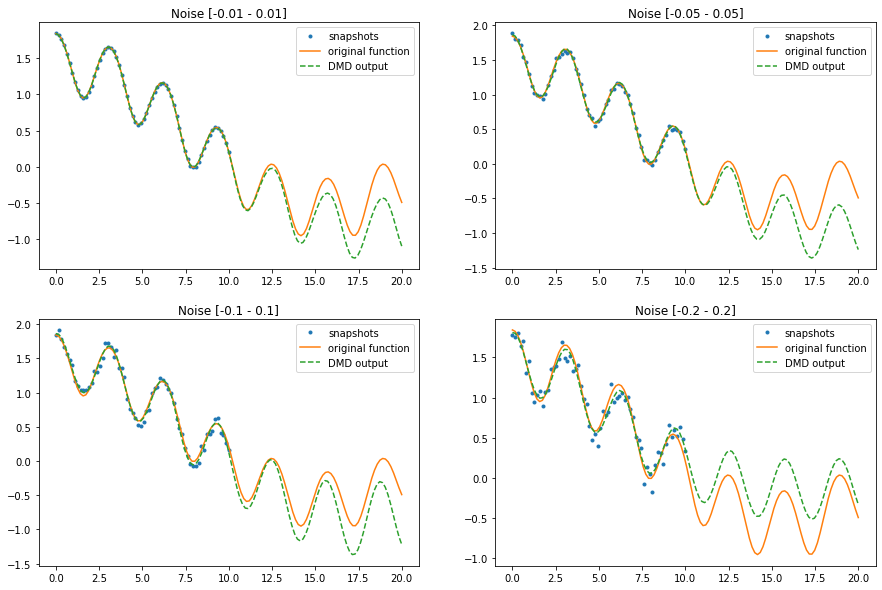

In [20]:
noise_range = [.01, .05, .1, .2]
fig = plt.figure(figsize=(15, 10))
future = 20

for id_plot, i in enumerate(noise_range, start=1):
    snapshots = y + np.random.uniform(-i, i, size=y.shape)
    hodmd = HODMD(svd_rank=0, exact=True, opt=True, d=30).fit(snapshots)
    hodmd.original_time['dt'] = hodmd.dmd_time['dt'] = x[1] - x[0]
    hodmd.original_time['t0'] = hodmd.dmd_time['t0'] = x[0]
    hodmd.original_time['tend'] = hodmd.dmd_time['tend'] = x[-1]
    hodmd.dmd_time['tend'] = 20
    
    plt.subplot(2, 2, id_plot)
    plt.plot(hodmd.original_timesteps, snapshots, '.', label='snapshots')
    plt.plot(np.linspace(0, future, 128), myfunc(np.linspace(0, future, 128)), '-', label='original function')
    plt.plot(hodmd.dmd_timesteps, hodmd.reconstructed_data[0].real, '--', label='DMD output')
    plt.legend()
    plt.title('Noise [{} - {}]'.format(-i, i))
plt.show()